<a href="https://colab.research.google.com/github/Sadikshya-dhakal/AI/blob/main/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

This code generates a simple synthetic dataset with three input features and two output variables, adding random noise to make the data more realistic, and organizes everything into a table for easy viewing.


In [ ]:
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate predictors (independent variables)
X = np.random.uniform(low=0, high=10, size=(n_samples, 3))  # 3 predictors

# True coefficients for Y1 and Y2
beta1 = np.array([2.5, -1.2, 0.8])  # For Y1
beta2 = np.array([1.0, 3.5, -0.5])  # For Y2

# Generate responses with some noise
noise = np.random.normal(0, 1, size=(n_samples, 2))  # Noise for both Y1 and Y2
Y1 = np.dot(X, beta1) + noise[:, 0]
Y2 = np.dot(X, beta2) + noise[:, 1]

# Stack responses into a matrix (multiple outputs)
Y = np.column_stack((Y1, Y2))

# Create a DataFrame for easier handling and visualization
data = pd.DataFrame({
    'X1': X[:, 0],
    'X2': X[:, 1],
    'X3': X[:, 2],
    'Y1': Y[:, 0],
    'Y2': Y[:, 1]
})

# Display first few rows
print("Sample data:")
print(data.head())

Sample data:
         X1        X2        X3         Y1         Y2
0  3.745401  9.507143  7.319939   3.856455  32.708832
1  5.986585  1.560186  1.559945  16.486139  11.301184
2  0.580836  8.661761  6.011150  -6.158246  28.077880
3  7.080726  0.205845  9.699099  24.552293   3.804067
4  8.324426  2.123391  1.818250  18.925076  14.732434


A **pairplot** is a type of visualization that shows **scatter plots for every pair of variables in a dataset** and histograms (or density plots) for each variable along the diagonal. It helps to **understand relationships, correlations, and patterns between variables** at a glance, making it easier to see how one variable changes with respect to another.


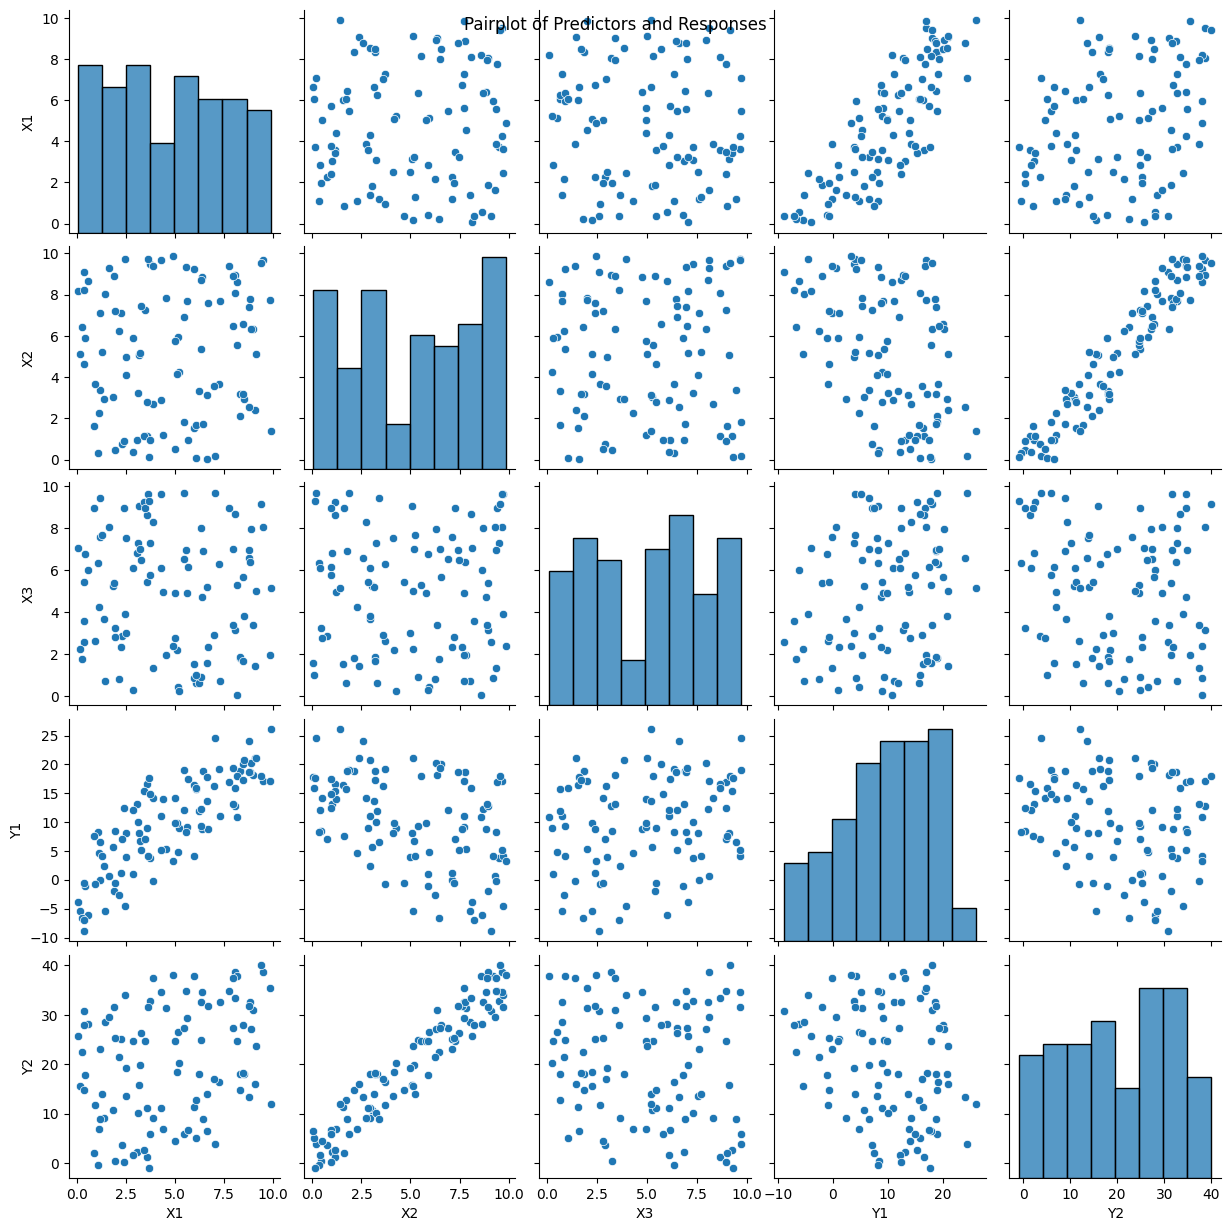

In [ ]:
# Pairplot to see relationships
sns.pairplot(data)
plt.suptitle("Pairplot of Predictors and Responses")
plt.show()

This section demonstrates **training and evaluating a multiple-output linear regression model**:

1. **Data Splitting:** The dataset is divided into **training** and **testing** sets, so the model can learn from one part and be evaluated on unseen data.

2. **Model Training:** A **linear regression model** is created and fitted to the training data, learning coefficients and intercepts for each target variable (Y1 and Y2).

3. **Prediction & Evaluation:** The model predicts outputs on the test set, and performance is measured using:

   * **R-squared (R²):** Shows how well the model explains the variance in each target.
   * **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values.

4. **Actual vs Predicted Plots:** Scatter plots compare **true values and predicted values** for Y1 and Y2. The closer points are to the diagonal line, the better the model predicts.

5. **Residual Analysis:** Residual plots show the difference between predicted and actual values. They help check if errors are randomly distributed (which is ideal) or if there are patterns, indicating potential problems with the model.



In [ ]:
# Split into features (X) and targets (Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 80
Testing samples: 20


In [ ]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Display coefficients for each response
print("Coefficients for Y1:", model.coef_[0])
print("Coefficients for Y2:", model.coef_[1])
print("Intercepts:", model.intercept_)

Coefficients for Y1: [ 2.51510632 -1.23363818  0.79790709]
Coefficients for Y2: [ 0.98053075  3.51330726 -0.52724935]
Intercepts: [0.21396656 0.04131668]


In [ ]:
# Predict on test set
Y_pred = model.predict(X_test)

# Calculate R-squared for each response
r2 = r2_score(Y_test, Y_pred, multioutput='raw_values')
print("R-squared for Y1:", r2[0])
print("R-squared for Y2:", r2[1])

# Calculate MSE for each response
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("MSE for Y1:", mse[0])
print("MSE for Y2:", mse[1])

R-squared for Y1: 0.9840375702560906
R-squared for Y2: 0.9890659357623406
MSE for Y1: 0.9597620042052935
MSE for Y2: 1.281638890957955


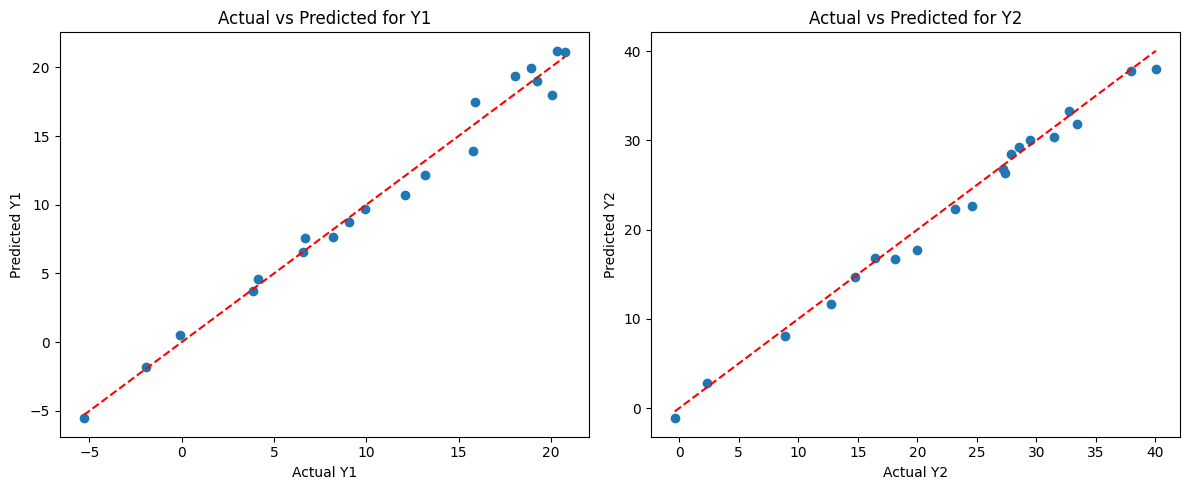

In [ ]:
# Actual vs Predicted for Y1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(Y_test[:, 0], Y_pred[:, 0])
plt.plot([min(Y_test[:, 0]), max(Y_test[:, 0])], [min(Y_test[:, 0]), max(Y_test[:, 0])], 'r--')
plt.xlabel('Actual Y1')
plt.ylabel('Predicted Y1')
plt.title('Actual vs Predicted for Y1')

# Actual vs Predicted for Y2
plt.subplot(1, 2, 2)
plt.scatter(Y_test[:, 1], Y_pred[:, 1])
plt.plot([min(Y_test[:, 1]), max(Y_test[:, 1])], [min(Y_test[:, 1]), max(Y_test[:, 1])], 'r--')
plt.xlabel('Actual Y2')
plt.ylabel('Predicted Y2')
plt.title('Actual vs Predicted for Y2')

plt.tight_layout()
plt.show()


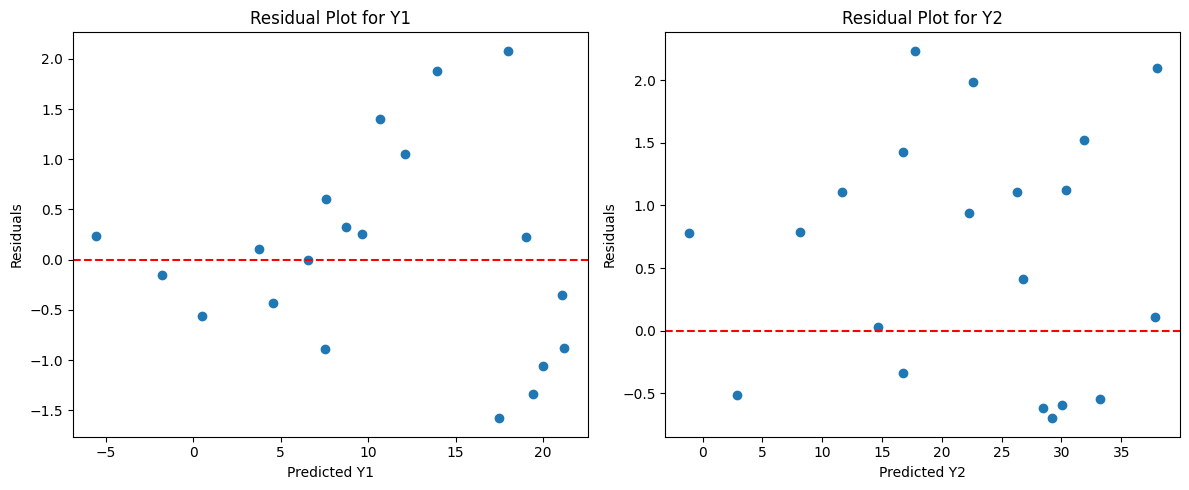

In [ ]:
# Residuals for Y1
residuals_y1 = Y_test[:, 0] - Y_pred[:, 0]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(Y_pred[:, 0], residuals_y1)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Y1')
plt.ylabel('Residuals')
plt.title('Residual Plot for Y1')

# Residuals for Y2
residuals_y2 = Y_test[:, 1] - Y_pred[:, 1]
plt.subplot(1, 2, 2)
plt.scatter(Y_pred[:, 1], residuals_y2)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Y2')
plt.ylabel('Residuals')
plt.title('Residual Plot for Y2')

plt.tight_layout()
plt.show()

The multiple-output linear regression model successfully learned the relationships between the three input features and the two target variables. The R-squared and MSE values show that the model predicts both Y1 and Y2 reasonably well. The actual vs predicted plots confirm that the predictions are close to the true values, and the residual plots indicate that errors are mostly random, suggesting a good fit.